#                                         GLOBUS POWER PLANT

In [1]:
#Importing Libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns
from plotly.subplots import make_subplots
from sklearn import metrics

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Data Analysis

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [3]:
df.shape
#Shape of the dataset

(907, 27)

In [4]:
df.primary_fuel

0      Solar
1       Coal
2       Wind
3        Gas
4       Coal
       ...  
902     Coal
903    Solar
904     Wind
905     Coal
906     Wind
Name: primary_fuel, Length: 907, dtype: object

In [5]:
df.sample(10)
#Sample of dataset

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
706,IND,India,SHANAN,IND0000403,110.0,31.9894,76.8072,Hydro,NaN,NaN,...,2019.0,NaN,505.28090,529.90715,470.5156,505.97740,470.02805,NaN,Central Electricity Authority,NaN
346,IND,India,KISHENGANGA,IND0000530,330.0,34.6490,74.7514,Hydro,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,1.67160,526.60375,NaN,Central Electricity Authority,NaN
603,IND,India,Panandhro Solar Power Plant,WRI1026180,5.0,23.6788,68.7653,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,IND,India,BANSAGAR (I),IND0000029,315.0,24.1917,81.2875,Hydro,NaN,NaN,...,2019.0,NaN,1075.95320,571.60760,1232.8249,542.64315,575.45825,NaN,Central Electricity Authority,NaN
220,IND,India,GANDHI NAGAR,IND0000122,630.0,25.2502,72.6765,Coal,Oil,NaN,...,2019.0,NaN,3034.57500,2441.21000,1938.2490,3358.73300,3326.36900,NaN,Central Electricity Authority,NaN
198,IND,India,Dhursar,WRI1020240,125.0,26.7846,72.0083,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,IND,India,TEESTA I-III,IND0000447,67.5,26.4875,88.3155,Hydro,NaN,NaN,...,2019.0,NaN,142.53773,79.62985,0.0000,130.36490,85.04265,NaN,Central Electricity Authority,NaN
320,IND,India,KANHER,IND0000179,4.0,17.7384,73.9170,Hydro,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,IND,India,VALUTHUR GT,IND0000496,187.2,9.3484,78.9235,Gas,NaN,NaN,...,2019.0,NaN,1014.80000,680.47500,906.9960,1198.13600,1125.96100,NaN,Central Electricity Authority,NaN
72,IND,India,BELLARY DG,IND0000044,25.2,NaN,NaN,Oil,NaN,NaN,...,2019.0,NaN,0.00000,0.00000,0.0000,0.00000,0.00000,NaN,Central Electricity Authority,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
df.columns
#Total Columns in DataSet

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [9]:
df.isnull().sum()
#Finding the NUll Values...

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [10]:
df.isnull().sum().sum()
#TotalNull Values

10445

In [11]:
#We are going to remove some columns those contain more null values and unwanted columns.
df.drop(['estimated_generation_gwh','generation_gwh_2013','generation_gwh_2019','wepp_id','other_fuel3','other_fuel1','other_fuel2','gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [12]:
df.shape

(907, 17)

In [13]:
df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [14]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [15]:
df.nunique()

country                    1
country_long               1
name                     907
capacity_mw              361
latitude                 836
longitude                827
primary_fuel               8
commissioning_year        73
source                   191
url                      304
geolocation_source         3
year_of_capacity_data      1
generation_gwh_2014      371
generation_gwh_2015      396
generation_gwh_2016      403
generation_gwh_2017      408
generation_gwh_2018      410
dtype: int64

In [16]:
df['name'].nunique()

907

In [17]:
df.drop(['name'],axis=1,inplace=True)
#Dropping colmn name since no use...

In [18]:
df.url

0      http://www.nrel.gov/csp/solarpaces/project_det...
1                        http://www.ultratechcement.com/
2      https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...
3                                 http://www.cea.nic.in/
4                                 http://www.cea.nic.in/
                             ...                        
902                               http://www.cea.nic.in/
903                            http://karnatakapower.com
904    https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...
905                             http://www.hzlindia.com/
906    https://cdm.unfccc.int/Projects/DB/RWTUV134503...
Name: url, Length: 907, dtype: object

In [19]:
df['url'].nunique()

304

In [20]:
df.drop(['url'],axis=1,inplace=True)
#Dropping colmn name url...

In [21]:
df.geolocation_source.isnull().sum()

19

In [22]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)
#Filling Nan

In [23]:
df.geolocation_source.isnull().sum()

0

In [24]:
df.head(10)

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,India,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2019.0,617.789264,843.7470,886.004428,663.774500,626.239128
4,IND,India,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2019.0,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000
5,IND,India,250.0,23.7689,68.6447,Coal,2005.0,Central Electricity Authority,WRI,2019.0,1153.421000,1208.8520,1175.765000,1147.913000,976.655000
6,IND,India,60.0,10.4547,77.0078,Hydro,1970.0,Central Electricity Authority,WRI,2019.0,157.558250,152.1952,61.421350,89.629600,48.327150
7,IND,India,192.0,32.2258,77.2070,Hydro,2010.0,Central Electricity Authority,WRI,2019.0,674.391100,721.3352,675.724400,679.594950,579.318850
8,IND,India,290.0,16.3300,75.8863,Hydro,2004.0,Central Electricity Authority,WRI,2019.0,480.594950,144.4342,402.029750,439.372100,406.377900
9,IND,India,210.0,23.1642,81.6373,Coal,2008.0,Central Electricity Authority,WRI,2019.0,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000


In [25]:
df.drop('year_of_capacity_data',axis=1,inplace=True)
#Dropping colm year_of_cap_data...

In [26]:
df.isnull().sum()

country                  0
country_long             0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source       0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [27]:
df.fillna(df.median()[0], inplace=True)
#Filling the NaN in numerical columns....

In [28]:
df.isnull().sum()
#Removed NaN..

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [29]:
df.drop(['country','country_long'],axis=1,inplace=True)

In [30]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [32]:
df.primary_fuel

0      Solar
1       Coal
2       Wind
3        Gas
4       Coal
       ...  
902     Coal
903    Solar
904     Wind
905     Coal
906     Wind
Name: primary_fuel, Length: 907, dtype: object

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

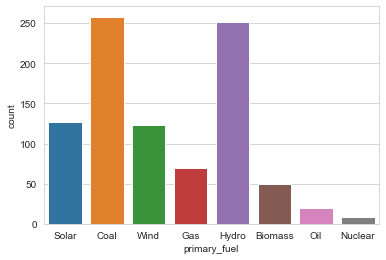

In [33]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

# EDA

<function matplotlib.pyplot.show(close=None, block=None)>

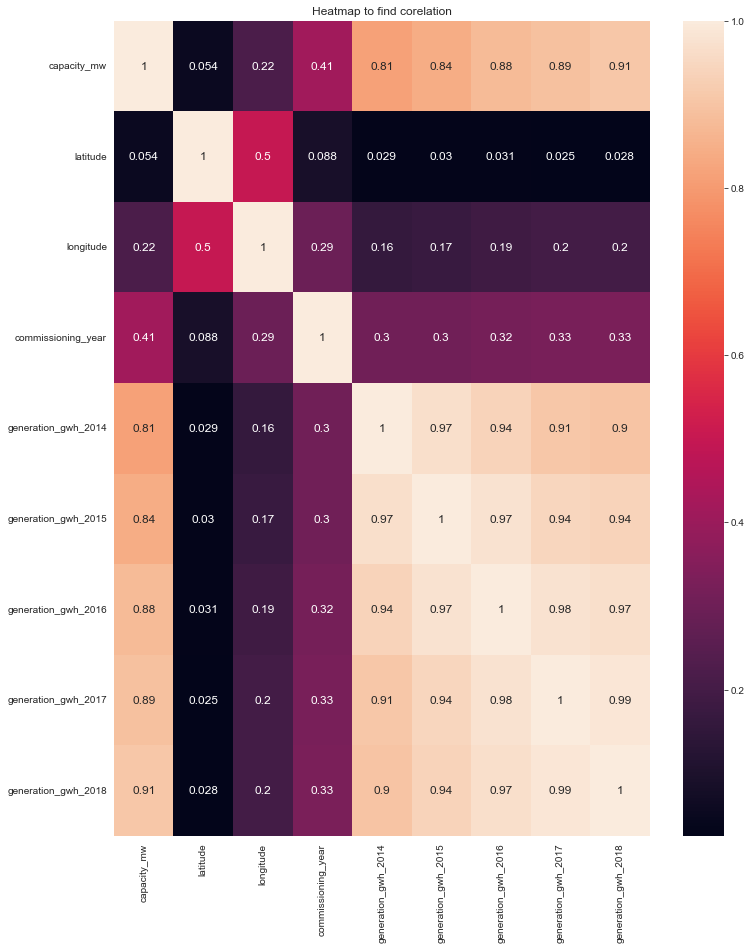

In [34]:
corr=df.corr().abs()
plt.figure(figsize=(12,15))
sns.heatmap(corr,annot=True,annot_kws={'size':12})
plt.title("Heatmap to find corelation")
plt.show
#HEATMAP to find corelation..

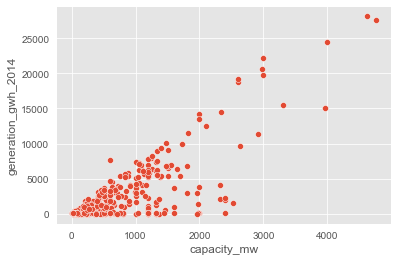

In [35]:
plt.style.use('ggplot')
sns.scatterplot(x = "capacity_mw", y = "generation_gwh_2014", data = df)
plt.show()

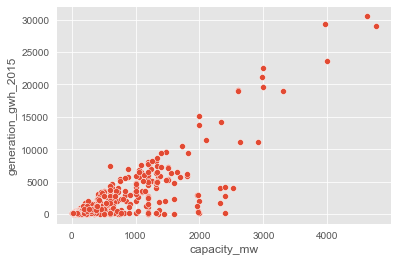

In [36]:
plt.style.use('ggplot')
sns.scatterplot(x = "capacity_mw", y = "generation_gwh_2015", data = df)
plt.show()

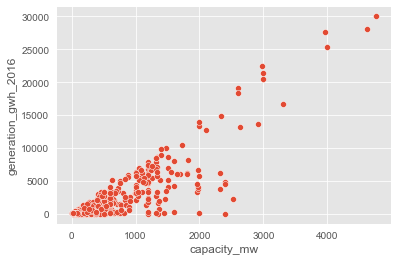

In [37]:
plt.style.use('ggplot')
sns.scatterplot(x = "capacity_mw", y = "generation_gwh_2016", data = df)
plt.show()

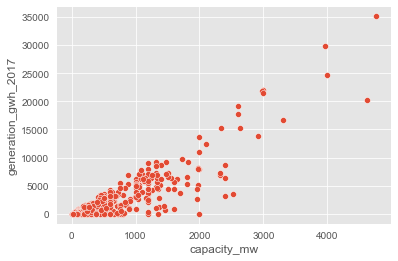

In [38]:
plt.style.use('ggplot')
sns.scatterplot(x = "capacity_mw", y = "generation_gwh_2017", data = df)
plt.show()

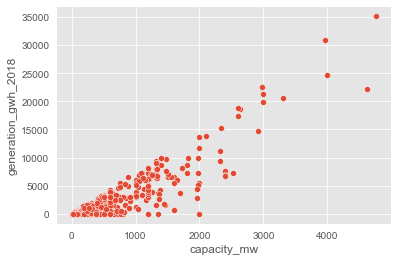

In [39]:
plt.style.use('ggplot')
sns.scatterplot(x = "capacity_mw", y = "generation_gwh_2018", data = df)
plt.show()

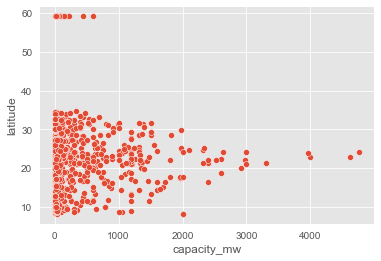

In [40]:
plt.style.use('ggplot')
sns.scatterplot(x = "capacity_mw", y = "latitude", data = df)
plt.show()

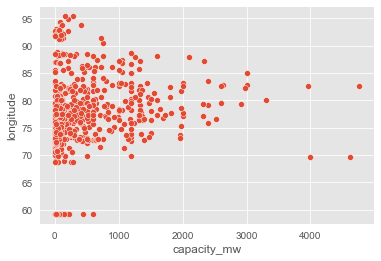

In [41]:
plt.style.use('ggplot')
sns.scatterplot(x = "capacity_mw", y = "longitude", data = df)
plt.show()

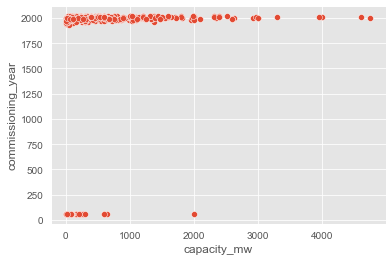

In [42]:
plt.style.use('ggplot')
sns.scatterplot(x = "capacity_mw", y = "commissioning_year", data = df)
plt.show()

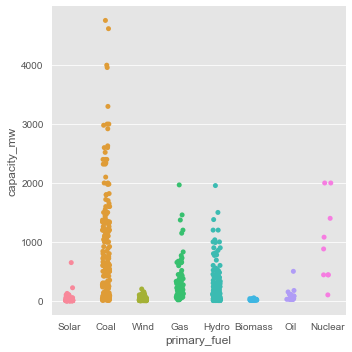

In [43]:
plt.style.use('seaborn-pastel')
sns.catplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

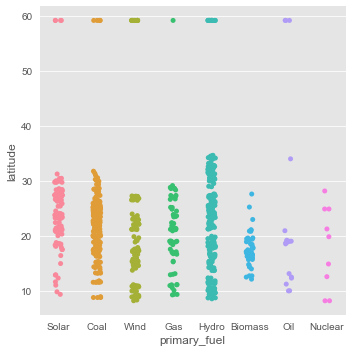

In [44]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

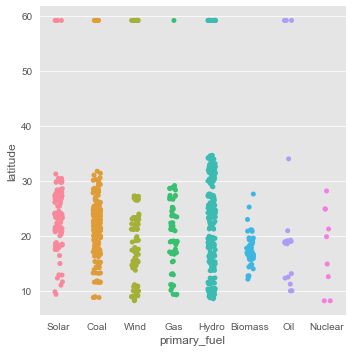

In [45]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

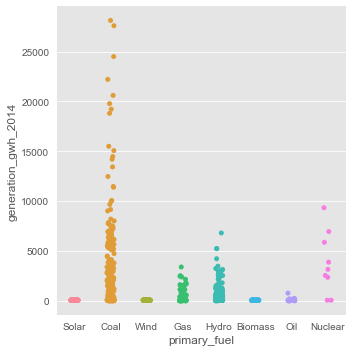

In [46]:
sns.catplot(x='primary_fuel',y='generation_gwh_2014',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

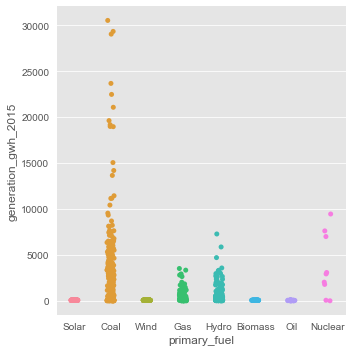

In [47]:
sns.catplot(x='primary_fuel',y='generation_gwh_2015',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

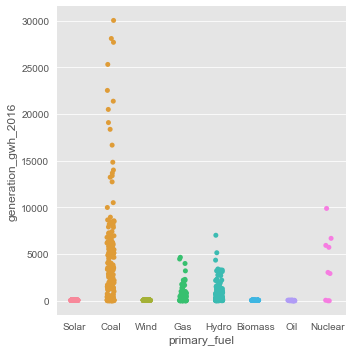

In [48]:
sns.catplot(x='primary_fuel',y='generation_gwh_2016',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

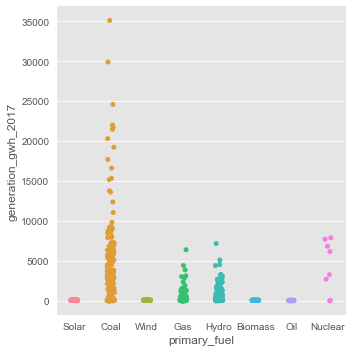

In [49]:
sns.catplot(x='primary_fuel',y='generation_gwh_2017',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

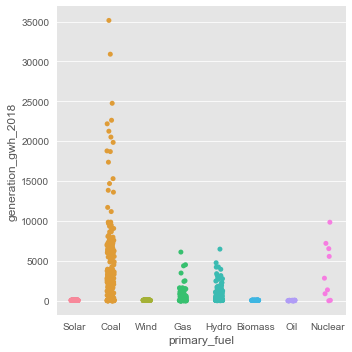

In [50]:
sns.catplot(x='primary_fuel',y='generation_gwh_2018',data=df)
plt.show

# ENCODING-LABEL ENCODER

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [53]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [54]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [55]:
lab_enc = LabelEncoder()
df['primary_fuel'] = lab_enc.fit_transform(df['primary_fuel'])
df['geolocation_source'] = lab_enc.fit_transform(df['geolocation_source'])
df['source'] = lab_enc.fit_transform(df['source'])

In [56]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [57]:
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

capacity_mw                AxesSubplot(0.125,0.71587;0.227941x0.16413)
latitude                AxesSubplot(0.398529,0.71587;0.227941x0.16413)
longitude               AxesSubplot(0.672059,0.71587;0.227941x0.16413)
primary_fuel              AxesSubplot(0.125,0.518913;0.227941x0.16413)
commissioning_year     AxesSubplot(0.398529,0.518913;0.227941x0.16413)
source                 AxesSubplot(0.672059,0.518913;0.227941x0.16413)
geolocation_source        AxesSubplot(0.125,0.321957;0.227941x0.16413)
generation_gwh_2014    AxesSubplot(0.398529,0.321957;0.227941x0.16413)
generation_gwh_2015    AxesSubplot(0.672059,0.321957;0.227941x0.16413)
generation_gwh_2016          AxesSubplot(0.125,0.125;0.227941x0.16413)
generation_gwh_2017       AxesSubplot(0.398529,0.125;0.227941x0.16413)
generation_gwh_2018       AxesSubplot(0.672059,0.125;0.227941x0.16413)
dtype: object

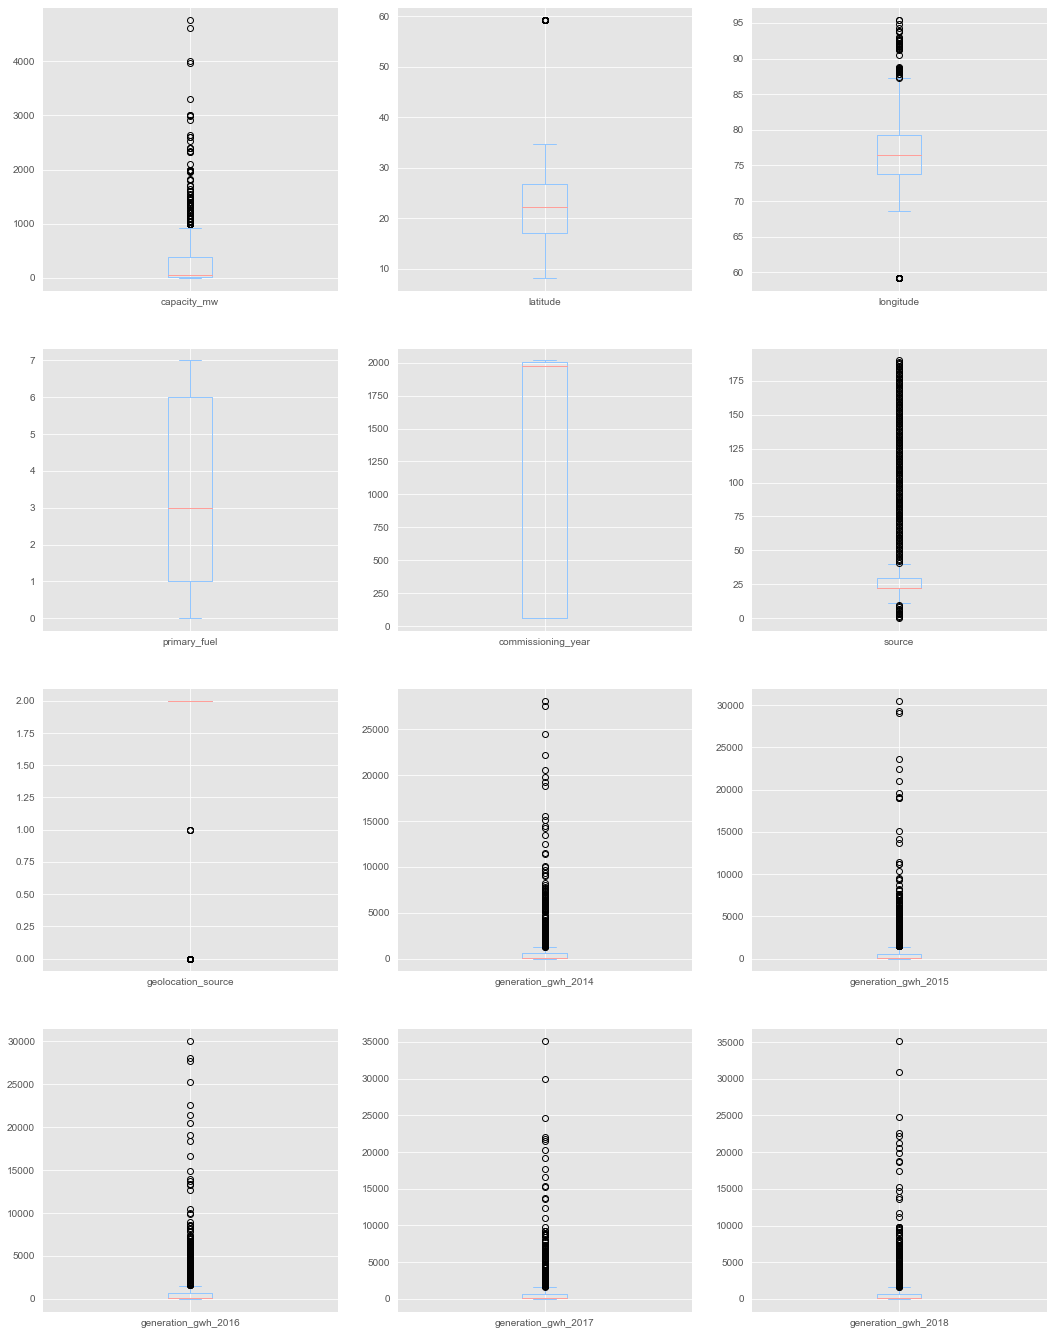

In [58]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(18,24))

# Removing Outliers-Z Score

In [59]:
from scipy.stats import zscore

In [60]:
z=np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       209, 209, 209, 209, 209, 209, 308, 308, 308, 308, 308, 308, 363,
       364, 364, 364, 364, 364, 364, 375, 482, 482, 493, 493, 493, 493,
       493, 493, 494, 494, 494, 494, 494, 494, 532, 623, 648, 648, 648,
       648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695,
       695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
       726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786, 788,
       808, 808, 808, 808, 808, 808, 880, 880, 880, 880, 880, 880],
      dtype=int64), array([1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 5, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2,
       3, 4, 5, 5, 0, 1, 2, 3, 4, 5, 5, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2,
       3, 4, 5, 0, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4,
       5, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 5, 0, 1, 2, 3,
       4, 5, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5], dtype=int64))


In [61]:
z = np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
threshold = 3

In [62]:
df1 = df[(z<3).all(axis = 1)]

In [63]:
df.shape

(907, 12)

In [64]:
df1.shape

(882, 12)

In [65]:
(df.shape[0]-df1.shape[0])/df.shape[0]*100
#After removing Outliers..

2.7563395810363835

# Skewness

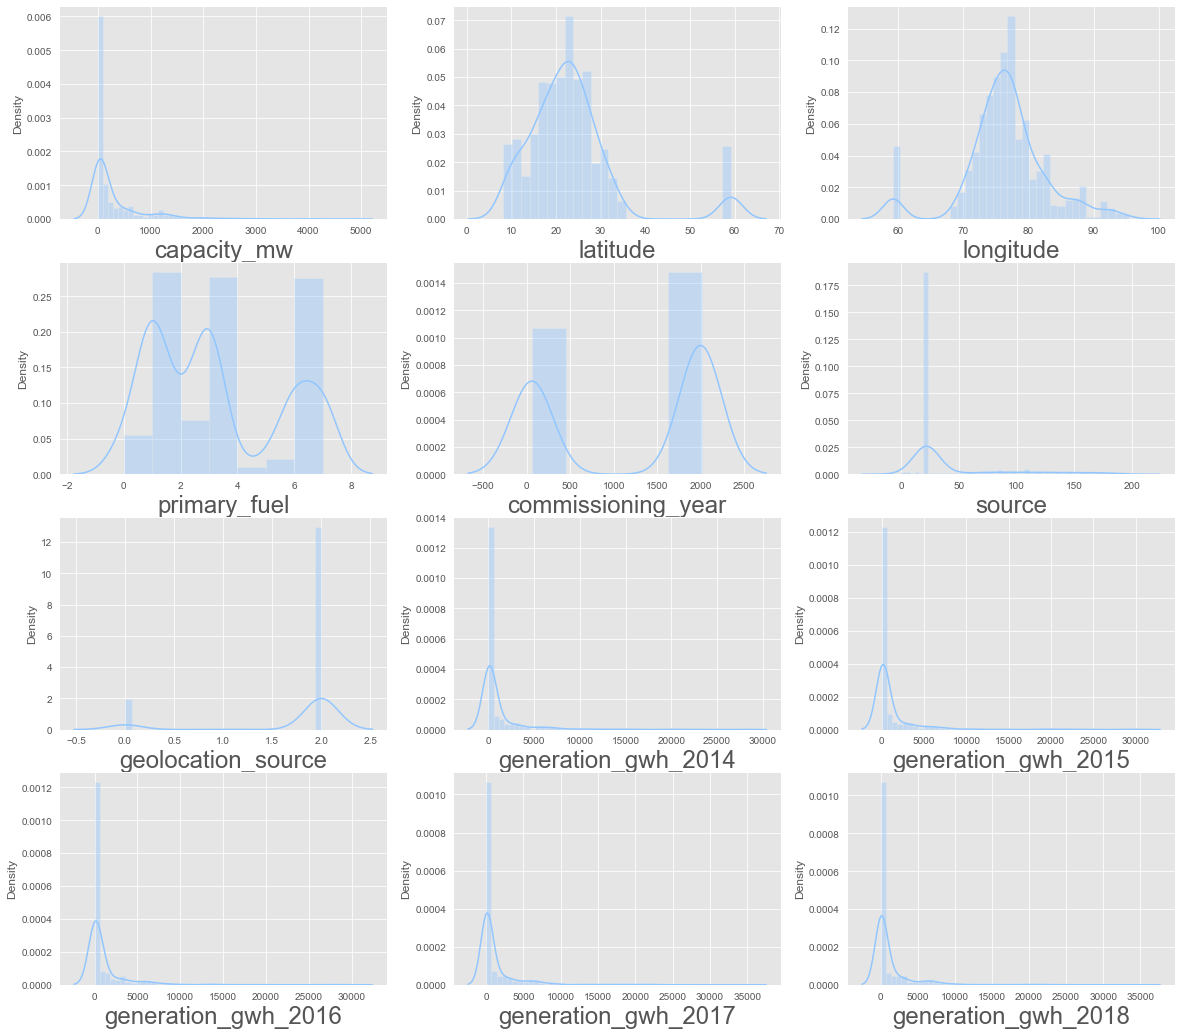

In [66]:
plt.figure(figsize=(20,18),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],kde=True)
        plt.xlabel(column,fontsize=24)
    plotnumber+=1
plt.show()

In [67]:
df.skew()

capacity_mw            3.123576
latitude               1.940249
longitude             -0.295883
primary_fuel           0.472251
commissioning_year    -0.328473
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2014    5.018549
generation_gwh_2015    5.292321
generation_gwh_2016    5.014692
generation_gwh_2017    5.010509
generation_gwh_2018    4.874039
dtype: float64

In [68]:
from sklearn.preprocessing import power_transform

In [69]:
df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw',"generation_gwh_2014",'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])

In [70]:
df.skew()

capacity_mw            0.022164
latitude               1.940249
longitude             -0.295883
primary_fuel           0.472251
commissioning_year    -0.328473
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2014   -0.021906
generation_gwh_2015   -0.017326
generation_gwh_2016   -0.010751
generation_gwh_2017   -0.005868
generation_gwh_2018    4.874039
generation_gwh_2013   -0.025038
dtype: float64

# Data Preprocessing

In [71]:
X=df.drop(['capacity_mw'],axis=1)
Y=df['capacity_mw']

In [72]:
X.shape,Y.shape

((907, 12), (907,))

# StandardScaler

In [73]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2013
0,0.490314,-0.526774,1.225688,0.863621,1.460215,-1.083349,-0.480768,-0.495756,-0.500284,-0.500906,-0.382173,-0.476612
1,0.159060,-0.308213,-0.967877,-1.177534,2.917019,0.394241,-0.480768,-0.495756,-0.500284,-0.500906,-0.382173,-0.476612
2,-0.118391,-1.144536,1.664401,-1.177534,-0.512075,0.394241,-0.480768,-0.495756,-0.500284,-0.500906,-0.382173,-0.476612
3,0.072301,2.367481,-0.529164,0.856301,-0.489662,0.394241,0.856915,0.848300,0.678482,0.624972,-0.209552,0.728652
4,-0.112915,0.937708,-0.967877,0.867804,-0.489662,0.394241,1.747502,1.737912,1.636981,1.752415,1.815722,1.484548
...,...,...,...,...,...,...,...,...,...,...,...,...
902,-0.662039,0.130697,-0.967877,0.868850,-0.489662,0.394241,-2.453637,0.201617,0.803261,0.668072,-0.191207,-0.476612
903,-0.991752,0.259856,1.225688,-1.177534,0.743019,-2.560940,-0.480768,-0.495756,-0.500284,-0.500906,-0.382173,-0.476612
904,-0.760817,-0.152938,1.664401,-1.177534,-0.512075,0.394241,-0.480768,-0.495756,-0.500284,-0.500906,-0.382173,-0.476612
905,0.118710,-0.445790,-0.967877,-1.177534,0.339596,0.394241,-0.480768,-0.495756,-0.500284,-0.500906,-0.382173,-0.476612


In [74]:
x=X_scaled

# VIF

In [75]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [76]:
vif

,vif
0,1.492125
1,1.731021
2,2.122596
3,2.264715
4,2.083170
5,1.941840
6,5.883453
7,9.731836
8,9.129839
9,8.410839


# ModelBuilding-REGRESSION

# LINEAR REGRESSION

In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [78]:
from sklearn.linear_model import LinearRegression

# RANDOM STATE

In [81]:
lin_reg=LinearRegression()

for i in range(0,100):
    x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=i)
    lin_reg.fit(x_train,Y_train)
    lin_reg_predict_train=lin_reg.predict(x_train)
    lin_reg_predict_test=lin_reg.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(Y_train,lin_reg_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(Y_test,lin_reg_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.6443542300013783
At random state 0, The test accuracy is: 0.6802098166818626


At random state 1, The training accuracy is: 0.6609650516902573
At random state 1, The test accuracy is: 0.6094770162875098


At random state 2, The training accuracy is: 0.6525164090193762
At random state 2, The test accuracy is: 0.6372017486121451


At random state 3, The training accuracy is: 0.6520439062719046
At random state 3, The test accuracy is: 0.6447930124828765


At random state 4, The training accuracy is: 0.6597424358623207
At random state 4, The test accuracy is: 0.6074218061244603


At random state 5, The training accuracy is: 0.637845650048702
At random state 5, The test accuracy is: 0.7044500226158601


At random state 6, The training accuracy is: 0.6737340427395939
At random state 6, The test accuracy is: 0.5416373678504259


At random state 7, The training accuracy is: 0.652479889359024
At random state 7, The test accuracy is: 0.6445148844536

# SPLITTING THE DATA WITH RANDOM STATE =98

In [82]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=.30,random_state=98)
#Making a new train and test..

In [84]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,Y_train)
print(lin_reg.score(x_train,Y_train))
lin_reg_predict=lin_reg.predict(x_test)

0.6317789641815876


In [86]:
print('MSE:',mean_squared_error(lin_reg_predict,Y_test))
print('MAE:',mean_absolute_error(lin_reg_predict,Y_test))
print('r2_score:',r2_score(lin_reg_predict,Y_test))

MSE: 0.32169663576648094
MAE: 0.43722479543409404
r2_score: 0.5069607661569236


In [107]:
print(cross_val_score(lin_reg,x,Y,cv=5).mean())

0.6358898754199849


# RIDGE

In [87]:
from sklearn.linear_model import Ridge

In [90]:
rid=Ridge()
rid.fit(x_train,Y_train)
print(rid.score(x_train,Y_train))
rid_pred=rid.predict(x_test)

0.6317779260201052


In [91]:
print('MSE:',mean_squared_error(rid_pred,Y_test))
print('MAE:',mean_absolute_error(rid_pred,Y_test))
print('r2_score:',r2_score(rid_pred,Y_test))

MSE: 0.321611319674331
MAE: 0.43731359309275275
r2_score: 0.5064851327057476


In [106]:
print(cross_val_score(rid,x,Y,cv=5).mean())

0.636064084787167


# LASSO

In [95]:
from sklearn.linear_model import Lasso

In [96]:
lasso=Lasso()
lasso.fit(x_train,Y_train)
print(rid.score(x_train,Y_train))
lasso_pred=lasso.predict(x_test)

0.6317779260201052


In [97]:
print('MSE:',mean_squared_error(lasso_pred,Y_test))
print('MAE:',mean_absolute_error(lasso_pred,Y_test))
print('r2_score:',r2_score(lasso_pred,Y_test))

MSE: 1.039049032454626
MAE: 0.8811123625324736
r2_score: 0.0


In [105]:
print(cross_val_score(lasso,x,Y,cv=5).mean())

-0.003970670182005876


# RandomForest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
RF=RandomForestRegressor()
RF.fit(x_train,Y_train)
print(RF.score(x_train,Y_train))
RF_PRED=RF.predict(x_test)

0.9671384672266312


In [100]:
print('MSE:',mean_squared_error(RF_PRED,Y_test))
print('MAE:',mean_absolute_error(RF_PRED,Y_test))
print('r2_score:',r2_score(RF_PRED,Y_test))

MSE: 0.15825152731311123
MAE: 0.2819116295184127
r2_score: 0.8306426832020292


In [104]:
print(cross_val_score(RF,x,Y,cv=5).mean())

0.7984811764565947


# GradientBoostingRegressor

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,Y_train)
print(GBR.score(x_train,Y_train))
GBR_PRED=GBR.predict(x_test)

0.894829658544589


In [102]:
print('MSE:',mean_squared_error(GBR_PRED,Y_test))
print('MAE:',mean_absolute_error(GBR_PRED,Y_test))
print('r2_score:',r2_score(GBR_PRED,Y_test))

MSE: 0.14259384857228868
MAE: 0.28305624217742986
r2_score: 0.8378813232565867


In [103]:
print(cross_val_score(GBR,x,Y,cv=5).mean())

0.8114134132631874


# HyperParameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV

In [115]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [118]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)
GF_grid.fit(x_train,Y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)
GF_grid.best_params_

Fitting 10 folds for each of 4 candidates, totalling 40 fits


{'criterion': 'mse', 'n_estimators': 100}

In [119]:
print('MSE:',mean_squared_error(GF_grid_pred,Y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,Y_test))
print('r2_score:',r2_score(GF_grid_pred,Y_test))

MSE: 0.15589013586494602
MAE: 0.2843925978512241
r2_score: 0.8337847944361406


# CLASSIFICATION MODEL

In [120]:
a=df.drop(['primary_fuel'],axis=1)
b=df['primary_fuel']

In [121]:
a.shape

(907, 12)

In [122]:
b.shape

(907,)

# train and test

In [123]:
from sklearn.model_selection import train_test_split

In [125]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=.27,random_state=42)

In [126]:
x_train.shape

(662, 12)

In [127]:
x_test.shape

(245, 12)

In [128]:
y_train.shape

(662,)

In [129]:
y_test.shape

(245,)

# MODEL BUILDING-LOGISTIC REGRESSION

In [130]:
from sklearn.linear_model import LogisticRegression

In [172]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [131]:
log=LogisticRegression()

In [137]:
log.fit(x_train,y_train)
log_pred=log.predict(x_test)

print(accuracy_score(y_test,log_pred))
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))
print("Training accuracy::",log.score(x_train,y_train))
print("Test accuracy::",log.score(x_test,y_test))

0.6612244897959184
[[ 2  0  0  0  0  0  4  2]
 [ 0 32  0 15  0  0 16  2]
 [ 0  3  0 15  0  0  3  2]
 [ 0  3  0 74  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  0  7  0  0  1  0]
 [ 0  4  0  0  0  0 16  3]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.73      0.49      0.59        65
           2       0.00      0.00      0.00        23
           3       0.66      0.96      0.78        77
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8
           6       0.40      0.70      0.51        23
           7       0.81      1.00      0.89        38

    accuracy                           0.66       245
   macro avg       0.45      0.42      0.40       245
weighted avg       0.60      0.66      0.60       245

Training accuracy:: 0.6404833836858006
Test accuracy:: 0.6612244897959184


In [138]:
print(cross_val_score(log,a,b,cv=5).mean())

0.6461477748770565


# KNeighborsClassifier

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6938775510204082
[[ 3  1  0  0  0  0  3  1]
 [ 3 45  1  9  0  0  6  1]
 [ 3  8  4  6  0  0  0  2]
 [ 0  8  5 64  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  4  2  1  0  1  0  0]
 [ 4  4  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.23      0.38      0.29         8
           1       0.62      0.69      0.66        65
           2       0.33      0.17      0.23        23
           3       0.79      0.83      0.81        77
           4       0.00      0.00      0.00         3
           5       1.00      0.12      0.22         8
           6       0.62      0.65      0.64        23
           7       0.90      1.00      0.95        38

    accuracy                           0.69       245
   macro avg       0.56      0.48      0.47       245
weighted avg       0.68      0.69      0.67       245

Training accuracy:: 0.7960725075528701
Test accuracy:: 0.6938775510204082


In [142]:
print(cross_val_score(knn,a,b,cv=5).mean())

0.6989557403922045


# RandomForestClassifier

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
Ran=RandomForestClassifier()
Ran.fit(x_train,y_train)
pred_Ran=Ran.predict(x_test)
print(accuracy_score(y_test,pred_Ran))
print(confusion_matrix(y_test,pred_Ran))
print(classification_report(y_test,pred_Ran))
print("Training accuracy::",Ran.score(x_train,y_train))
print("Test accuracy::",Ran.score(x_test,y_test))

0.8367346938775511
[[ 5  2  0  0  0  0  0  1]
 [ 4 54  4  3  0  0  0  0]
 [ 0  8  8  4  0  3  0  0]
 [ 0  2  0 75  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  1  4  1  0  2  0  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.78      0.83      0.81        65
           2       0.50      0.35      0.41        23
           3       0.89      0.97      0.93        77
           4       0.00      0.00      0.00         3
           5       0.40      0.25      0.31         8
           6       1.00      1.00      1.00        23
           7       0.97      1.00      0.99        38

    accuracy                           0.84       245
   macro avg       0.64      0.63      0.63       245
weighted avg       0.81      0.84      0.82       245

Training accuracy:: 1.0
Test accuracy:: 0.8367346938775511


In [145]:
print(cross_val_score(Ran,a,b,cv=5).mean())

0.8511747920587698


# AdaBoostClassifier

In [146]:
from sklearn.ensemble import AdaBoostClassifier


In [149]:
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
pred_Ada=Ada.predict(x_test)
print(accuracy_score(y_test,pred_Ada))
print(confusion_matrix(y_test,pred_Ada))
print(classification_report(y_test,pred_Ada))
print("Training accuracy::",Ada.score(x_train,y_train))
print("Test accuracy::",Ada.score(x_test,y_test))

0.3673469387755102
[[ 0  8  0  0  0  0  0  0]
 [ 0 63  0  2  0  0  0  0]
 [ 0 23  0  0  0  0  0  0]
 [ 0 71  0  6  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  6  0  2  0  0  0  0]
 [ 0  0  0  2  0  0 21  0]
 [ 0 38  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.30      0.97      0.45        65
           2       0.00      0.00      0.00        23
           3       0.50      0.08      0.13        77
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         8
           6       1.00      0.91      0.95        23
           7       0.00      0.00      0.00        38

    accuracy                           0.37       245
   macro avg       0.22      0.25      0.19       245
weighted avg       0.33      0.37      0.25       245

Training accuracy:: 0.4561933534743202
Test accuracy:: 0.3673469387755102


In [150]:
print(cross_val_score(Ada,a,b,cv=5).mean())

0.5293303381701171


# BaggingClassifier

In [151]:
from sklearn.ensemble import BaggingClassifier

In [152]:
Bag=BaggingClassifier()
Bag.fit(x_train,y_train)
pred_Bag=Bag.predict(x_test)
print(accuracy_score(y_test,pred_Bag))
print(confusion_matrix(y_test,pred_Bag))
print(classification_report(y_test,pred_Bag))
print("Training accuracy::",Bag.score(x_train,y_train))
print("Test accuracy::",Bag.score(x_test,y_test))

0.8244897959183674
[[ 6  2  0  0  0  0  0  0]
 [ 3 53  5  3  0  1  0  0]
 [ 0  7  7  5  0  4  0  0]
 [ 0  4  0 73  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  1  3  1  0  3  0  0]
 [ 0  0  0  0  0  1 22  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.77      0.82      0.79        65
           2       0.47      0.30      0.37        23
           3       0.88      0.95      0.91        77
           4       0.00      0.00      0.00         3
           5       0.33      0.38      0.35         8
           6       1.00      0.96      0.98        23
           7       1.00      1.00      1.00        38

    accuracy                           0.82       245
   macro avg       0.64      0.64      0.64       245
weighted avg       0.81      0.82      0.81       245

Training accuracy:: 0.986404833836858
Test accuracy:: 0.8244897959183674


In [153]:
print(cross_val_score(Bag,a,b,cv=5).mean())

0.8423592981604031


# Gradient Boosting classifier

In [154]:
from sklearn.ensemble import GradientBoostingClassifier

In [156]:
Gra=GradientBoostingClassifier()
Gra.fit(x_train,y_train)
pred_Gra=Gra.predict(x_test)
print(accuracy_score(y_test,pred_Gra))
print(confusion_matrix(y_test,pred_Gra))
print(classification_report(y_test,pred_Gra))
print("Training accuracy::",Gra.score(x_train,y_train))
print("Test accuracy::",Gra.score(x_test,y_test))

0.8204081632653061
[[ 5  3  0  0  0  0  0  0]
 [ 2 55  4  4  0  0  0  0]
 [ 1  6  9  4  0  3  0  0]
 [ 0  7  1 69  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  2  2  1  2  0  0]
 [ 0  0  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.73      0.85      0.79        65
           2       0.56      0.39      0.46        23
           3       0.87      0.90      0.88        77
           4       0.00      0.00      0.00         3
           5       0.40      0.25      0.31         8
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        38

    accuracy                           0.82       245
   macro avg       0.65      0.63      0.63       245
weighted avg       0.80      0.82      0.81       245

Training accuracy:: 1.0
Test accuracy:: 0.8204081632653061


In [157]:
print(cross_val_score(Gra,a,b,cv=5).mean())

0.8644041041831096


# HyperarameterTuning

In [158]:
Ran=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [159]:
Ran_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [160]:
Ran_grid.fit(x_train,y_train)
Ran_pred=Ran_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,Ran_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.8244897959183674


In [166]:
Ran_grid.best_params_

{'criterion': 'entropy',
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 10}

In [168]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]   }

In [169]:
best_Ran_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [170]:
best_Ran_grid.fit(x_train,y_train)
best_Ran_pred=best_Ran_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_Ran_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8408163265306122


# Classificationreport

In [175]:
print(classification_report(y_test,best_Ran_pred))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.78      0.83      0.81        65
           2       0.56      0.39      0.46        23
           3       0.90      0.96      0.93        77
           4       0.00      0.00      0.00         3
           5       0.43      0.38      0.40         8
           6       1.00      1.00      1.00        23
           7       0.97      1.00      0.99        38

    accuracy                           0.84       245
   macro avg       0.65      0.65      0.65       245
weighted avg       0.82      0.84      0.83       245



In [177]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [180]:
y_prob = best_Ran_grid.fit(x_train,y_train).predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
One-vs-One ROC AUC scores:
0.911611 (macro),
0.931176 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.933133 (macro),
0.962599 (weighted by prevalence)


# Conclusion

In [181]:
#SAVING THE PROJECT
import joblib

In [182]:
joblib.dump(best_Ran_grid.best_estimator_,'Global Power Plant.obj')

['Global Power Plant.obj']